In [ ]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-5w4pba1d
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-5w4pba1d
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0f84004a0ede6e4cb87f98edbf46f6c2784b002bd_-cp36-none-any.whl size=126412 sha256=fc08c6fa6b93c2ef9ba5af8662f81228ed5cd1c0af593c03123d7aed43e73ad6
  Stored in directory: /tmp/pip-ephem-wheel-cache-rwb4kart/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [3]:
from numpy import loadtxt
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0


In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
# load the dataset
from google.colab import files
uploaded = files.upload()
# dataset = loadtxt('ForwardTrain.csv', delimiter=',')
# test = loadtxt('ForwardTest.csv', delimiter=',')

Saving ExtraData.csv to ExtraData.csv


In [ ]:
column_names = ['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12','T13','T14','T15','T16', 'T17','T18','T19','Radius','X','Y']
raw_dataset = pd.read_csv('ExtraData.csv', names=column_names,
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,Radius,X,Y
600,318.06,333.08,348.01,362.77,377.25,391.29,404.68,417.10,428.14,437.29,443.90,447.25,446.56,441.10,430.30,413.87,391.97,365.31,335.10,0.04,0.15,0.11
601,319.58,336.14,352.68,369.15,385.47,401.51,417.06,431.80,445.31,456.98,466.05,471.59,472.55,467.87,456.59,438.10,412.34,380.07,342.88,0.04,0.15,0.12
602,320.97,338.98,357.04,375.14,393.27,411.32,429.11,446.37,462.63,477.24,489.33,497.74,501.16,498.13,487.20,467.17,437.44,398.63,352.75,0.04,0.15,0.13
603,322.21,341.49,360.92,380.54,400.37,420.36,440.41,460.25,479.46,497.32,512.81,524.58,531.06,530.58,521.35,501.20,468.23,422.20,365.55,0.04,0.15,0.14
604,323.27,343.66,364.30,385.27,406.67,428.53,450.79,473.27,495.56,516.89,536.00,551.06,560.08,561.72,555.33,538.46,505.51,452.67,382.63,0.04,0.15,0.15


In [ ]:
train_dataset = dataset.sample(frac=0.95,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
train_stats = train_dataset.describe()
for i in range(19,22):
  train_stats.pop(column_names[i])
# train_stats.pop('T1')  
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
T1,575.0,320.844104,14.256363,304.79,310.715,316.49,325.925,387.41
T2,575.0,338.253861,27.952960,306.56,318.245,329.63,348.080,465.95
T3,575.0,354.790383,40.566859,308.28,325.625,342.45,369.135,533.32
T4,575.0,370.021704,51.678900,309.93,332.725,354.38,389.380,592.91
T5,575.0,383.555165,61.040464,311.47,338.595,365.48,408.135,636.43
T6,575.0,395.059478,68.573092,312.88,344.460,374.77,425.530,674.72
T7,575.0,404.268609,74.301317,314.12,348.730,382.42,438.670,698.76
T8,575.0,410.977043,78.292462,315.15,352.525,388.18,449.120,718.01
T9,575.0,415.038713,80.618333,315.93,354.455,391.29,454.885,726.17
T10,575.0,416.368400,81.331781,316.43,355.390,392.06,457.760,731.11


In [ ]:
column_names[19:22]

['Radius', 'X', 'Y']

In [ ]:
train_labels = train_dataset[column_names[19:20]]
test_labels = test_dataset[column_names[19:20]]
train_data = train_dataset[column_names[0:19]]
test_data = test_dataset[column_names[0:19]]
train_data.tail()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19
571,346.19,389.52,433.06,476.78,520.43,563.43,604.61,642.03,672.98,694.59,705.46,706.32,697.14,674.72,636.43,583.66,520.43,450.76,377.62
128,321.14,338.25,353.40,365.82,375.03,380.87,383.49,383.28,380.78,376.49,370.92,364.45,357.39,349.95,342.28,334.49,326.64,318.77,310.89
28,313.45,323.56,332.99,341.41,348.49,353.99,357.73,359.65,359.81,358.37,355.56,351.64,346.87,341.44,335.56,329.34,322.91,316.34,309.69
183,319.57,335.95,351.91,367.18,381.40,394.15,404.90,413.12,418.29,420.06,418.29,413.12,404.90,394.15,381.40,367.18,351.91,335.95,319.57
459,326.97,350.92,374.83,398.60,422.09,445.02,466.96,487.27,505.07,519.24,528.48,531.47,527.06,514.51,493.70,465.21,430.28,390.49,347.53


In [ ]:
#Normalizing the model
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_data)
normed_test_data = norm(test_data)
normed_test_data.tail()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19
543,0.546836,0.555438,0.569914,0.589569,0.612624,0.636992,0.659765,0.678519,0.691298,0.696549,0.693891,0.683567,0.667036,0.646223,0.623524,0.601774,0.582975,0.568995,0.560528
544,0.876514,0.889929,0.912558,0.943099,0.979102,1.016587,1.051682,1.080602,1.100014,1.107951,1.103428,1.087249,1.061259,1.028745,0.993294,0.959162,0.929726,0.907719,0.894468
551,-0.351008,-0.351085,-0.351774,-0.351627,-0.350672,-0.348526,-0.344793,-0.339586,-0.333407,-0.326298,-0.318703,-0.310890,-0.303224,-0.295902,-0.289159,-0.282989,-0.277416,-0.273287,-0.270769
559,1.988999,2.039360,2.124138,2.242468,2.389314,2.556404,2.731330,2.899423,3.046593,3.163973,3.248557,3.298394,3.307599,3.273914,3.205463,3.119331,3.034180,2.965422,2.921553
599,-0.305415,-0.298497,-0.285957,-0.266873,-0.240089,-0.204446,-0.159467,-0.105081,-0.041786,0.029160,0.105749,0.185376,0.264825,0.340999,0.410526,0.471104,0.520360,0.557040,0.580422


In [ ]:
#Building the model
def build_model(neurons_1,neurons_2,act):
  model = keras.Sequential([
    layers.Dense(neurons_1, activation=act, input_shape=[len(train_data.keys())]),
    layers.Dense(neurons_2, activation=act, input_shape=[len(train_data.keys())]),
    layers.Dense(1)  
     ])

  optimizer = tf.keras.optimizers.RMSprop(0.0005)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model(128,128,'relu')

In [ ]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 128)               2560      
_________________________________________________________________
dense_71 (Dense)             (None, 16)                2064      
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 17        
Total params: 4,641
Trainable params: 4,641
Non-trainable params: 0
_________________________________________________________________


In [ ]:
example_batch = train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[12.368034],
       [11.865044],
       [12.422077],
       [12.169491],
       [11.796585],
       [12.029423],
       [11.932743],
       [12.566071],
       [11.781036],
       [ 9.794804]], dtype=float32)

In [ ]:
EPOCHS = 2300

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.0114,  mae:0.0539,  mse:0.0114,  val_loss:0.0011,  val_mae:0.0287,  val_mse:0.0011,  
....................................................................................................
Epoch: 100, loss:0.0001,  mae:0.0079,  mse:0.0001,  val_loss:0.0000,  val_mae:0.0044,  val_mse:0.0000,  
....................................................................................................
Epoch: 200, loss:0.0000,  mae:0.0041,  mse:0.0000,  val_loss:0.0000,  val_mae:0.0033,  val_mse:0.0000,  
....................................................................................................
Epoch: 300, loss:0.0000,  mae:0.0026,  mse:0.0000,  val_loss:0.0000,  val_mae:0.0027,  val_mse:0.0000,  
....................................................................................................
Epoch: 400, loss:0.0000,  mae:0.0022,  mse:0.0000,  val_loss:0.0000,  val_mae:0.0028,  val_mse:0.0000,  
........................................................................

In [ ]:
#  EPOCHS = 1000
# # The patience parameter is the amount of epochs to check for improvement
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

# history = model.fit(normed_train_data, train_labels, 
#                     epochs=EPOCHS, validation_split = 0.2, verbose=0, 
#                      callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.0002,  mae:0.0102,  mse:0.0002,  val_loss:0.0001,  val_mae:0.0100,  val_mse:0.0001,  
....................................................................................................
Epoch: 100, loss:0.0002,  mae:0.0094,  mse:0.0002,  val_loss:0.0000,  val_mae:0.0048,  val_mse:0.0000,  
.............................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
2295,0.000008,0.001703,0.000008,0.000007,0.001888,0.000007,2295
2296,0.000004,0.001347,0.000004,0.000010,0.002104,0.000010,2296
2297,0.000006,0.001544,0.000006,0.000007,0.001780,0.000007,2297
2298,0.000007,0.001597,0.000007,0.000007,0.001980,0.000007,2298
2299,0.000005,0.001424,0.000005,0.000009,0.002063,0.000009,2299


In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [Params]')

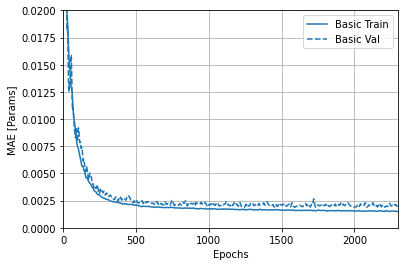

In [ ]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 0.02])
plt.ylabel('MAE [Params]')

Text(0, 0.5, 'MSE [Params^2]')

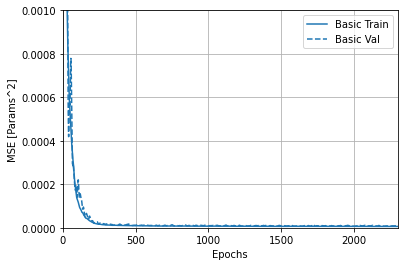

In [ ]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 0.001])
plt.ylabel('MSE [Params^2]')

Text(0, 0.5, 'MAE [Params]')

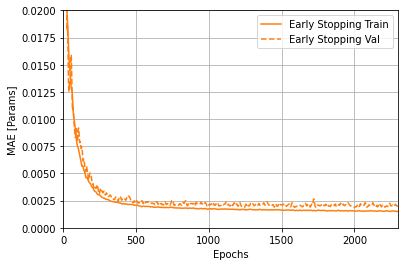

In [ ]:
plotter.plot({'Early Stopping': history}, metric = "mae")
plt.ylim([0, 0.02])
plt.ylabel('MAE [Params]')

In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} meter".format(mae))

Testing set Mean Abs Error:  0.00 meter


In [ ]:
test_predictions = model.predict(normed_test_data)
test_predictions_flat = model.predict(normed_test_data).flatten()
np.shape(test_predictions)
test_predictions

array([[0.01948456],
       [0.02178847],
       [0.01869101],
       [0.02094987],
       [0.01587575],
       [0.01305981],
       [0.0252298 ],
       [0.02264501],
       [0.02525657],
       [0.02247147],
       [0.02360421],
       [0.02801188],
       [0.02649164],
       [0.03132407],
       [0.03093544],
       [0.02907209],
       [0.02852452],
       [0.02698511],
       [0.03489567],
       [0.03147752],
       [0.03466958],
       [0.0376649 ],
       [0.03562935],
       [0.03962556],
       [0.03867725],
       [0.03891634],
       [0.03939027],
       [0.03366625],
       [0.03943924],
       [0.03893269]], dtype=float32)

In [ ]:
# test_labels['X']
np.shape(test_labels)
test_labels_flat = test_labels.values.flatten()

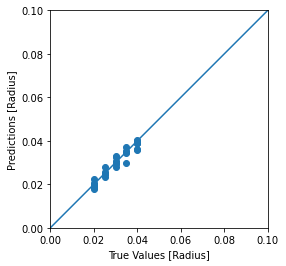

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels['Radius'], test_predictions_flat[0:1133:1])
plt.xlabel('True Values [Radius]')
plt.ylabel('Predictions [Radius]')
lims = [0,0.1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

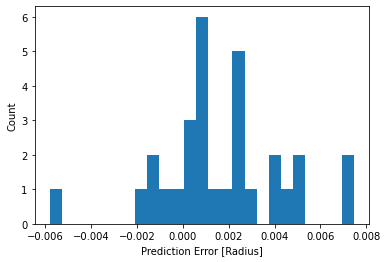

In [ ]:
error = test_predictions_flat[0:1133] - test_labels_flat[0:1133]
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Radius]")
_ = plt.ylabel("Count")

In [ ]:
def lsr(x,y):
  diff = x-y
  return np.sum(np.square(diff))

In [ ]:
def rsquare(x,y):
  std = np.std(y)
  least_square = lsr(x,y)
  return (std-least_square)/std

In [ ]:
lsr(test_labels['Radius'],test_predictions[:,0])

0.7809678944123588

In [ ]:
rsquare(test_labels['Radius'],test_predictions[:,0])

0.9838486151904575

In [ ]:
normed_test_data.tail()
normed_test_data.shape

(30, 19)

In [ ]:
import math
sigmas = np.linspace(0.01,0.3,30)
corrs =[]
for sigma in sigmas:
  noise = np.random.normal(0, sigma, normed_test_data.shape)
  noisy_test_data = normed_test_data+noise
  loss, mae, mse = model.evaluate(noisy_test_data, test_labels, verbose=0)
  test_predictions = model.predict(noisy_test_data)
  test_predictions_flat=test_predictions.flatten()
  error = test_predictions_flat[0:1133] - test_labels_flat[0:1133]
  corr = rsquare(test_labels['Radius'],test_predictions[:,0])
  corrs.append(corr)

In [ ]:
print(np.random.normal(0,1,(5,5)))
corrs

[[ 0.92425617 -0.53599562 -0.62761734 -2.12981497  2.64028478]
 [ 0.91470329  0.47505068  1.03781555  1.43903859 -0.70317658]
 [-0.07724735 -0.42554355  1.66101323  1.27555111 -0.8670756 ]
 [ 0.92679774  0.13444465  1.38518735 -0.51414644  0.87175502]
 [ 0.40020646  0.78542658  0.77037745  0.87996454 -0.86104064]]


[0.9595253229114945,
 0.9505095378125924,
 0.896317593868695,
 0.8842945272574136,
 0.8140431113824445,
 0.8368247737770587,
 0.8232733158196378,
 0.8416978477549264,
 0.8041287872428553,
 0.8089524434727104,
 0.8527810137431081,
 0.7921257379220176,
 0.6307409757940948,
 0.6876458870116083,
 0.5837887876701547,
 0.6862482846692729,
 0.7032340751500491,
 0.5780314955581207,
 0.4109730168149472,
 0.5881823795039676,
 0.6035910802146626,
 0.6137892719904154,
 0.4044187556774486,
 0.2857778662106599,
 0.2761801063396905,
 0.4525717989937877,
 0.4680903964433298,
 0.3912381210551682,
 0.4925906777305982,
 0.09355006635869981]

Text(0, 0.5, 'Correlation co efficient')

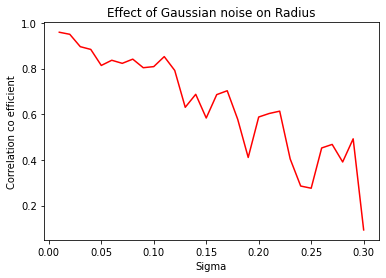

In [ ]:
plt.title("Effect of Gaussian noise on Radius")
plt.plot(sigmas, corrs,c="red")
plt.xlabel('Sigma')
plt.ylabel('Correlation co efficient')



In [6]:
sigmas = np.linspace(0.01,0.3,30)
for sigma in sigmas:
  noise = np.random.normal(0, sigma, (30, 19))
  print(noise)

[[-2.62836139e-03  9.94289242e-03  9.84599050e-03  4.58114949e-03
  -9.90608728e-03 -1.98991647e-02 -1.21462410e-02  1.13672435e-03
   1.86261121e-02  1.81321464e-02 -2.51641137e-02 -1.22541768e-02
  -3.11576080e-03  4.43002463e-03  1.30788904e-02 -7.26065605e-03
  -1.20201321e-04  9.51124833e-03  1.52991279e-02]
 [ 2.81805948e-03  7.55445788e-03 -2.31589110e-03 -1.08863419e-02
   9.36472895e-03 -4.35867800e-03  3.04660924e-02  2.13926338e-02
   5.47578640e-04  1.49166065e-02 -1.46205097e-02  3.48632907e-03
  -1.39138907e-03  5.59406736e-03 -1.17137000e-02 -9.24299537e-03
  -9.46598461e-03  3.91457762e-03 -7.51867646e-03]
 [ 2.77899790e-03  1.00792392e-02  1.55106109e-02 -1.99435302e-02
   7.62501050e-03  7.28229329e-03  1.26338730e-02  5.45146999e-03
   3.36748608e-03  1.84272608e-02 -7.11946965e-03 -1.43020126e-02
  -7.54053072e-03 -8.70061342e-03  1.59232361e-03  7.64306073e-03
   6.14462048e-04  1.42414472e-04 -1.57177574e-02]
 [ 2.85455973e-03  9.49364924e-03 -1.34215610e-02 -1.69